In [ ]:
Corrections (ou compléments) demandées par le mentor évaluateur:

TEXTE :
- freq_mot
- WordCloud
- CountVect
- TF-IDF : Calcul le score de mot...
- reduction de dim
- Clustering, 
- TSNE


IMAGE :
- fonction filtrage bruit 
- fonction égalisation histo
- Reduction DIM
- Kmeans
- TSNE


Votre mission est de réaliser une première étude de faisabilité d'un moteur de classification d'articles basé sur une image et une description pour l'automatisation de l'attribution de la catégorie de l'article.

Vous analyserez le jeu de données en réalisant un prétraitement des images et des descriptions des produits, une réduction de dimension, puis un clustering. Les résultats du clustering seront présentés sous la forme d’une représentation en deux dimensions à déterminer, qui ’illustrera le fait que les caractéristiques extraites permettent de regrouper des produits de même catégorie.

La représentation graphique vous aidera à convaincre Linda que cette approche de modélisation permettra bien de regrouper des produits de même catégorie.

In [24]:
import pandas as pd

In [25]:
df = pd.read_csv('flipkart_com-ecommerce_sample_1050.csv')[['product_name', 'product_category_tree', 'image', 'description']]

In [26]:
df.head(3)

,product_name,product_category_tree,image,description
0,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",55b85ea15a1536d46b7190ad6fff8ce7.jpg,Key Features of Elegance Polyester Multicolor ...
1,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",7b72c92c2f6c40268628ec5f14c6d590.jpg,Specifications of Sathiyas Cotton Bath Towel (...
2,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",64d5d4a258243731dc7bbb1eef49ad74.jpg,Key Features of Eurospa Cotton Terry Face Towe...


In [27]:
df.product_category_tree[47]

'["Computers >> Network Components >> Routers >> D-Link Routers >> D-Link DAP1320 (White)"]'

In [28]:
df.isna().mean()

product_name             0.0
product_category_tree    0.0
image                    0.0
description              0.0
dtype: float64

# TRAITEMENT DE LA VARIABLE TERGET : product_category_tree

In [29]:
def get_category(chaine):
    ch = chaine[2:]
    j=0
    for i in ch:
        if i != '>':
            j+=1
        else:
            break

    return ch[:j-1]

In [30]:
df.product_category_tree = df.product_category_tree.apply(get_category)

In [31]:
df.product_category_tree.value_counts()

Beauty and Personal Care      150
Home Decor & Festive Needs    150
Watches                       150
Kitchen & Dining              150
Baby Care                     150
Computers                     150
Home Furnishing               150
Name: product_category_tree, dtype: int64

## ENCODAGE DE LA VARIABLE "product_category_tree" EN VALEUR NUMERIQUE

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
df['product_category_tree'] = LabelEncoder().fit_transform(df['product_category_tree'])

In [12]:
df['product_category_tree'].value_counts()

6    150
5    150
4    150
3    150
2    150
1    150
0    150
Name: product_category_tree, dtype: int64

In [32]:
#!pip install -q unidecode
#!pip install -r requirements.txt
#!pip install  -q re
#!pip install -q stop_words

import nltk
#nltk.download('stopwords')

import re, unidecode
from nltk.corpus import stopwords
#!pip install stop_words
from stop_words import get_stop_words

from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer

from collections import Counter



In [73]:
!pip install opencv-python

In [33]:

def tokenize_sentence(sentence):
    return nltk.RegexpTokenizer(r"\w+").tokenize(sentence)

#-----------------------------------------------------------------

"""
    La lemmatisation en NLP est le processus par lequel plusieurs formes différentes du même mot 
    sont mappées en une seule forme, que nous pouvons appeler la forme racine ou la forme de base.


def lemmatize_sentence(sentence):
    lem = WordNetLemmatizer()
    stem = stemm_sentence(sentence)
    chaine = ''
    for ch in [lem.lemmatize(word,"v") for word in stem]:
        chaine +=' '+ch
    return chaine
"""
#-----------------------------------------------------------------
"""
    Le Stemming en NLP est le processus de suppression des préfixes et des suffixes des mots
    afin qu'ils soient réduits à des formes plus simples appelées tiges.
    Le but du stemming est le même que celui de la lemmatisation :
        réduire notre vocabulaire et notre dimensionnalité 
        pour les tâches de PNL et améliorer la vitesse et l'efficacité 
        des tâches de recherche et de traitement de l'information.
"""
def stemm_sentence(sentence):
    ps = PorterStemmer()

    stemmed_words = ''
    for w in tokenize_sentence(sentence):
        stemmed_words +=' '+ps.stem(w)
    return stemmed_words

#-----------------------------------------------------------------

sw1 = (stopwords.words('english'))
sw2 = list(get_stop_words('en'))

# Fusion des listes
stop=list(set(sw1+sw2))

#-----------------------------------------------------------------

def nettoyage(chaine):
    # mettre toute la chaine de caratère en minuscule
    chaine = unidecode.unidecode(chaine).lower()
    p="([a-z]{1,})"
    ch = ''
    for elm in re.findall(p,stemm_sentence(chaine)):
        if elm in stop or len(elm)<=2 :
            continue
        else:
            ch+=' '+elm
    return ch.strip()

In [34]:
df['description'][0]

'Key Features of Elegance Polyester Multicolor Abstract Eyelet Door Curtain Floral Curtain,Elegance Polyester Multicolor Abstract Eyelet Door Curtain (213 cm in Height, Pack of 2) Price: Rs. 899 This curtain enhances the look of the interiors.This curtain is made from 100% high quality polyester fabric.It features an eyelet style stitch with Metal Ring.It makes the room environment romantic and loving.This curtain is ant- wrinkle and anti shrinkage and have elegant apparance.Give your home a bright and modernistic appeal with these designs. The surreal attention is sure to steal hearts. These contemporary eyelet and valance curtains slide smoothly so when you draw them apart first thing in the morning to welcome the bright sun rays you want to wish good morning to the whole world and when you draw them close in the evening, you create the most special moments of joyous beauty given by the soothing prints. Bring home the elegant curtain that softly filters light in your room so that you

In [35]:
tokenize_sentence(df['description'][0])

['Key',
 'Features',
 'of',
 'Elegance',
 'Polyester',
 'Multicolor',
 'Abstract',
 'Eyelet',
 'Door',
 'Curtain',
 'Floral',
 'Curtain',
 'Elegance',
 'Polyester',
 'Multicolor',
 'Abstract',
 'Eyelet',
 'Door',
 'Curtain',
 '213',
 'cm',
 'in',
 'Height',
 'Pack',
 'of',
 '2',
 'Price',
 'Rs',
 '899',
 'This',
 'curtain',
 'enhances',
 'the',
 'look',
 'of',
 'the',
 'interiors',
 'This',
 'curtain',
 'is',
 'made',
 'from',
 '100',
 'high',
 'quality',
 'polyester',
 'fabric',
 'It',
 'features',
 'an',
 'eyelet',
 'style',
 'stitch',
 'with',
 'Metal',
 'Ring',
 'It',
 'makes',
 'the',
 'room',
 'environment',
 'romantic',
 'and',
 'loving',
 'This',
 'curtain',
 'is',
 'ant',
 'wrinkle',
 'and',
 'anti',
 'shrinkage',
 'and',
 'have',
 'elegant',
 'apparance',
 'Give',
 'your',
 'home',
 'a',
 'bright',
 'and',
 'modernistic',
 'appeal',
 'with',
 'these',
 'designs',
 'The',
 'surreal',
 'attention',
 'is',
 'sure',
 'to',
 'steal',
 'hearts',
 'These',
 'contemporary',
 'eyelet'

In [36]:
stemm_sentence(df['description'][0])

' key featur of eleg polyest multicolor abstract eyelet door curtain floral curtain eleg polyest multicolor abstract eyelet door curtain 213 cm in height pack of 2 price Rs 899 thi curtain enhanc the look of the interior thi curtain is made from 100 high qualiti polyest fabric It featur an eyelet style stitch with metal ring It make the room environ romant and love thi curtain is ant wrinkl and anti shrinkag and have eleg appar give your home a bright and modernist appeal with these design the surreal attent is sure to steal heart these contemporari eyelet and valanc curtain slide smoothli so when you draw them apart first thing in the morn to welcom the bright sun ray you want to wish good morn to the whole world and when you draw them close in the even you creat the most special moment of joyou beauti given by the sooth print bring home the eleg curtain that softli filter light in your room so that you get the right amount of sunlight specif of eleg polyest multicolor abstract eyelet

In [37]:
#lemmatize_sentence(df['description'][0])

In [38]:
# Teste de la sortie de notre fonction de nettoyage
nettoyage(df['description'][0])

'key featur eleg polyest multicolor abstract eyelet door curtain floral curtain eleg polyest multicolor abstract eyelet door curtain height pack price thi curtain enhanc look interior thi curtain made high qualiti polyest fabric featur eyelet style stitch metal ring make room environ romant love thi curtain ant wrinkl anti shrinkag eleg appar give home bright modernist appeal design surreal attent sure steal heart contemporari eyelet valanc curtain slide smoothli draw apart first thing morn welcom bright sun ray want wish good morn whole world draw close even creat special moment joyou beauti given sooth print bring home eleg curtain softli filter light room get right amount sunlight specif eleg polyest multicolor abstract eyelet door curtain height pack gener brand eleg design door type eyelet model name abstract polyest door curtain set model duster color multicolor dimens length box number content sale packag pack sale packag curtain bodi design materi polyest'

In [39]:
#df1['description'] = df1['description'].apply(lambda x : nettoyage(x))

df['description'] = df['description'].apply(nettoyage)

In [23]:
bag_of_word = ''
for mot in df['description'][2].split():
    bag_of_word += ' ' + mot
bag_of_word

' key featur eurospa cotton terri face towel set size small height inch gsm eurospa cotton terri face towel set piec face towel set assort price eurospa bring exclus design soft cotton towel export qualiti product soft textur take care skin give enrich feel deserv eurospa export bath towel lot renown brand last year famou fine print absorb soft durabl note product cotton suscept shrinkag product color may vari pictur size may vari wash care wash cold water iron bleach flat dri wash befor first use size face towel specif eurospa cotton terri face towel set piec face towel set assort bath towel featur materi cotton terri design shuvam gener brand eurospa gsm type face towel set model name shuvam pcftsetassort ideal boy girl men women model shuvam pcftsetassort size small color assort dimens weight length inch width inch box number content sale packag sale packag piec face towel set'

In [40]:
ls = []
for i in range(df.shape[0]):
    ls+=df['description'][i].split()
ls

['key',
 'featur',
 'eleg',
 'polyest',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'floral',
 'curtain',
 'eleg',
 'polyest',
 'multicolor',
 'abstract',
 'eyelet',
 'door',
 'curtain',
 'height',
 'pack',
 'price',
 'thi',
 'curtain',
 'enhanc',
 'look',
 'interior',
 'thi',
 'curtain',
 'made',
 'high',
 'qualiti',
 'polyest',
 'fabric',
 'featur',
 'eyelet',
 'style',
 'stitch',
 'metal',
 'ring',
 'make',
 'room',
 'environ',
 'romant',
 'love',
 'thi',
 'curtain',
 'ant',
 'wrinkl',
 'anti',
 'shrinkag',
 'eleg',
 'appar',
 'give',
 'home',
 'bright',
 'modernist',
 'appeal',
 'design',
 'surreal',
 'attent',
 'sure',
 'steal',
 'heart',
 'contemporari',
 'eyelet',
 'valanc',
 'curtain',
 'slide',
 'smoothli',
 'draw',
 'apart',
 'first',
 'thing',
 'morn',
 'welcom',
 'bright',
 'sun',
 'ray',
 'want',
 'wish',
 'good',
 'morn',
 'whole',
 'world',
 'draw',
 'close',
 'even',
 'creat',
 'special',
 'moment',
 'joyou',
 'beauti',
 'given',
 'sooth',
 'print',
 'b

In [45]:
len(set(ls))

3923

In [15]:
from collections import defaultdict

In [41]:
Counter(ls).most_common(10)

[('onli', 890),
 ('product', 870),
 ('free', 618),
 ('buy', 581),
 ('replac', 570),
 ('ship', 569),
 ('deliveri', 567),
 ('genuin', 564),
 ('cash', 564),
 ('price', 561)]

In [54]:
Counter(ls).most_common(10)[0][:]

('onli', 890)

In [85]:
# Définition d'une fonction permettant créer un dictionnaire de mots associés à leurs fréquence
def dict_freq_val(liste):
    return dict([(k, liste.count(k)) for k in set(liste)])

# Création du dictionnaire
dic = dict_freq_val(ls)

# Création d'une liste de mots ayant une fréquence supéreur ou à 10
l = []
for k,v in sorted(dic.items(), key=lambda x : x[1], reverse=True):
    if v < 10 :
        continue
    else :
        l.append(k)

l[:10], l[-10:]

(['onli',
  'product',
  'free',
  'buy',
  'replac',
  'ship',
  'deliveri',
  'cash',
  'genuin',
  'price'],
 ['talleng',
  'attitud',
  'gum',
  'fork',
  'modern',
  'slim',
  'krishna',
  'residu',
  'bubbl',
  'youth'])

In [86]:
l[:20]

['onli',
 'product',
 'free',
 'buy',
 'replac',
 'ship',
 'deliveri',
 'cash',
 'genuin',
 'price',
 'day',
 'flipkart',
 'com',
 'guarante',
 'mug',
 'thi',
 'featur',
 'design',
 'onlin',
 'specif']

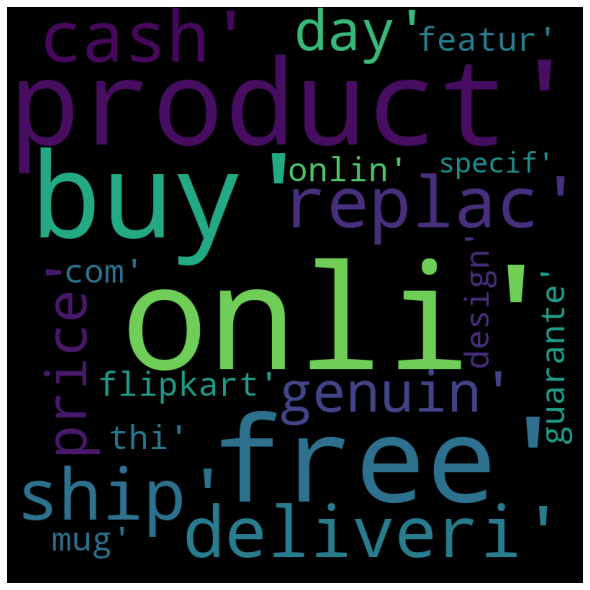

In [63]:
#!pip install -q wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Création du wordCloud des 20 premiers mots les plus fréquents
wordcloud = WordCloud(
                    width=800,
                    height=800,
                    background_color = 'black',
                    stopwords = set(STOPWORDS),
                    min_font_size = 10
                    ).generate(str(l[:20]))

# Affichage de l'image WordCloud
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig('Word_Cloud_Ens_Prod.png')

plt.show()

## BAG OF WORD

### CountVectorizer

In [87]:
from sklearn.feature_extraction.text import CountVectorizer
 

CountVec = CountVectorizer(ngram_range=(1,1), # to use bigrams ngram_range=(2,2)
                           stop_words='english')
#transform
Count_data = CountVec.fit_transform(l)
 
#create dataframe
cv_dataframe=pd.DataFrame(Count_data.toarray(),columns=CountVec.get_feature_names())
print(cv_dataframe.shape)
cv_dataframe

(818, 782)


,absorb,abstract,accessori,actual,adapt,add,addit,adhes,adjust,ador,...,women,wood,wooden,work,world,wow,wrap,year,yellow,youth
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
814,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
815,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
816,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
cv_dataframe.describe()

,absorb,abstract,accessori,actual,adapt,add,addit,adhes,adjust,ador,...,women,wood,wooden,work,world,wow,wrap,year,yellow,youth
count,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,...,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000,818.000000
mean,0.001222,0.001222,0.001222,0.001222,0.001222,0.001222,0.001222,0.001222,0.001222,0.001222,...,0.001222,0.001222,0.001222,0.001222,0.001222,0.001222,0.001222,0.001222,0.001222,0.001222
std,0.034964,0.034964,0.034964,0.034964,0.034964,0.034964,0.034964,0.034964,0.034964,0.034964,...,0.034964,0.034964,0.034964,0.034964,0.034964,0.034964,0.034964,0.034964,0.034964,0.034964
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Réduction de dimension PCA
* La réduction PCA permet de créer des features décorrélées entre elles, et de diminuer leur dimension, tout en gardant un niveau de variance expliquée élevé (99%)
* L'impact est une meilleure séparation des données via le T-SNE et une réduction du temps de traitement du T-SNE

In [89]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", cv_dataframe.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(cv_dataframe)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (818, 782)
Dimensions dataset après réduction PCA :  (818, 774)


## Réduction de dimension T-SNE
* Réduction de dimension en 2 composantes T-SNE pour affichage en 2D des images

In [103]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = df.product_category_tree
print(df_tsne.shape)


(818, 3)


# Analyse visuelle : affichage T-SNE selon catégories d'images

In [91]:
import seaborn as sns

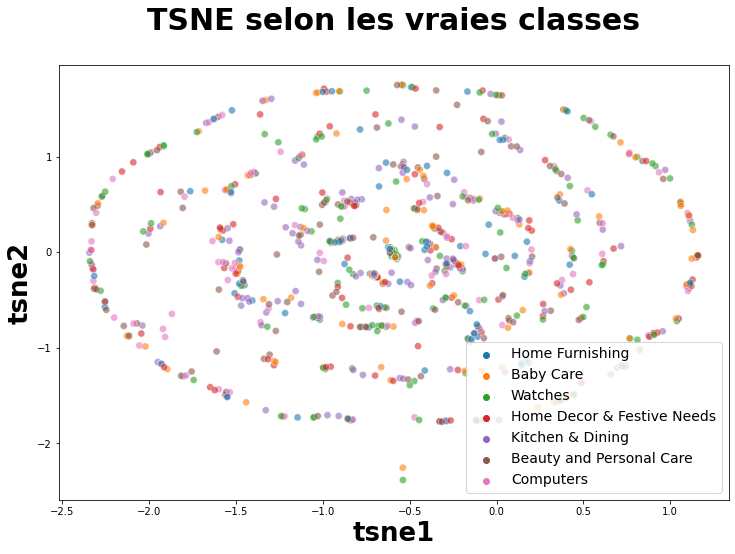

In [104]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()


# Analyse mesures : similarité entre catégories et clusters

##  Création de clusters à partir du T-SNE

In [94]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)

from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)


(818, 4)
(818, 4)


###  Affichage des images selon clusters et calcul ARI de similarité catégories images / clusters
* Le score ARI de 0.00333349826798755 reste très faible

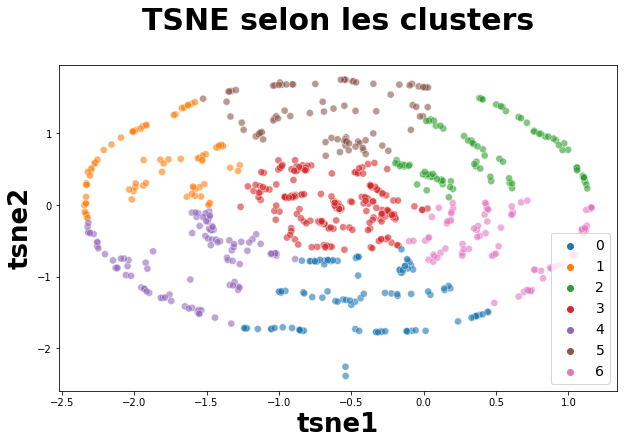

ARI :  0.00333349826798755


In [96]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

labels = df.product_category_tree
print("ARI : ", metrics.adjusted_rand_score(labels[:818], cls.labels_))

### TF-IDF : avec TfidfVectorizer

In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer
 
#Définition tf-idf
tf_idf_vec = TfidfVectorizer(use_idf=True, 
                        smooth_idf=False,  
                        ngram_range=(1,1),
                        stop_words='english')
#transformation
tf_idf_data = tf_idf_vec.fit_transform(l)
 
#création dataframe
tf_idf_dataframe=pd.DataFrame(tf_idf_data.toarray(),columns=tf_idf_vec.get_feature_names())
tf_idf_dataframe


,absorb,abstract,accessori,actual,adapt,add,addit,adhes,adjust,ador,...,women,wood,wooden,work,world,wow,wrap,year,yellow,youth
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
814,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
816,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## REDUCTION DIMENSION PCA

In [98]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", tf_idf_dataframe.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(tf_idf_dataframe)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (818, 782)
Dimensions dataset après réduction PCA :  (818, 774)


## REDUCTION DIMENSION T-SNE
* Réduction de dimension en 2 composantes T-SNE pour affichage en 2D des images

In [99]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = df.product_category_tree
print(df_tsne.shape)

(818, 3)


# Analyse visuelle : affichage T-SNE selon catégories d'images

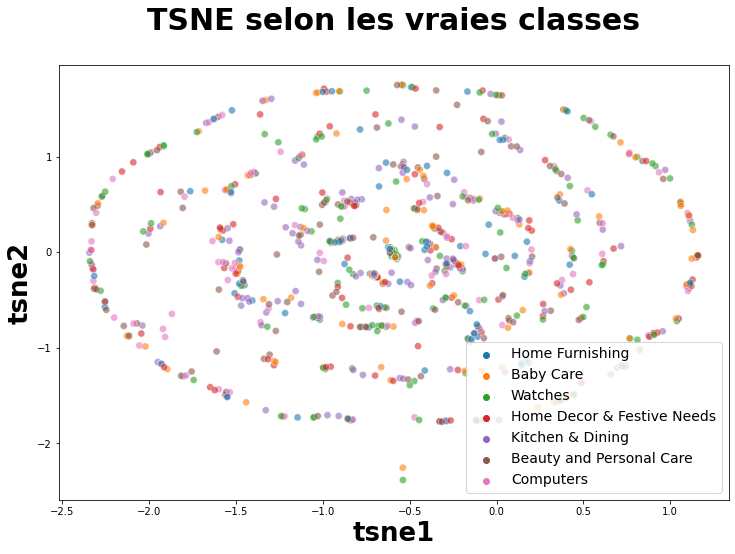

In [100]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()


# Analyse mesures : similarité entre catégories et clusters

##  Création de clusters à partir du T-SNE

In [101]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)

from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)


(818, 4)
(818, 4)


###  Affichage des images selon clusters et calcul ARI de similarité catégories images / clusters
* Le score ARI de 0.00333349826798755 reste très faible

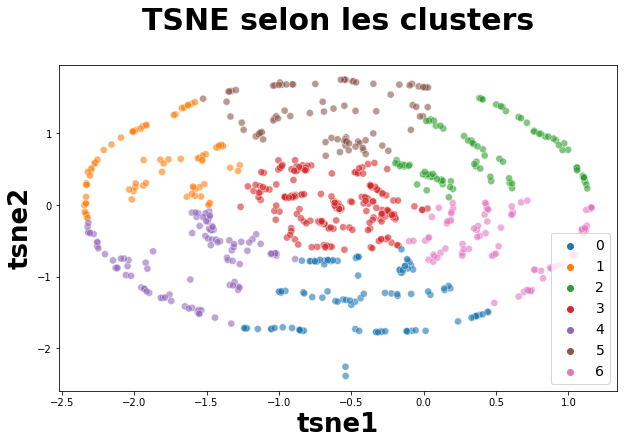

ARI :  0.00333349826798755


In [102]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

labels = df.product_category_tree
print("ARI : ", metrics.adjusted_rand_score(labels[:818], cls.labels_))

## Extraction de caractéristiques avec le vectoriseur Tf-Idf

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
 

#without smooth IDF
print("Without Smoothing:")
#define tf-idf
tf_idf_vec = TfidfVectorizer(use_idf=True, 
                        smooth_idf=False,  
                        ngram_range=(1,1),stop_words='english') # to use only  bigrams ngram_range=(2,2)
#transform
tf_idf_data = tf_idf_vec.fit_transform(df['description'])
 
#create dataframe
tf_idf_dataframe=pd.DataFrame(tf_idf_data.toarray(),columns=tf_idf_vec.get_feature_names())
print(tf_idf_dataframe)
print("\n")
 
#with smooth
tf_idf_vec_smooth = TfidfVectorizer(use_idf=True,  
                        smooth_idf=True,  
                        ngram_range=(1,1),stop_words='english')

 
tf_idf_data_smooth = tf_idf_vec_smooth.fit_transform(df['description'])
 
print("With Smoothing:")
tf_idf_dataframe_smooth=pd.DataFrame(tf_idf_data_smooth.toarray(),columns=tf_idf_vec_smooth.get_feature_names())
print(tf_idf_dataframe_smooth)


Without Smoothing:
      aaa  aapno  aari  aarika  abil  abkl  abl  abod  abov  abras  ...  \
0     0.0    0.0   0.0     0.0   0.0   0.0  0.0   0.0   0.0    0.0  ...   
1     0.0    0.0   0.0     0.0   0.0   0.0  0.0   0.0   0.0    0.0  ...   
2     0.0    0.0   0.0     0.0   0.0   0.0  0.0   0.0   0.0    0.0  ...   
3     0.0    0.0   0.0     0.0   0.0   0.0  0.0   0.0   0.0    0.0  ...   
4     0.0    0.0   0.0     0.0   0.0   0.0  0.0   0.0   0.0    0.0  ...   
...   ...    ...   ...     ...   ...   ...  ...   ...   ...    ...  ...   
1045  0.0    0.0   0.0     0.0   0.0   0.0  0.0   0.0   0.0    0.0  ...   
1046  0.0    0.0   0.0     0.0   0.0   0.0  0.0   0.0   0.0    0.0  ...   
1047  0.0    0.0   0.0     0.0   0.0   0.0  0.0   0.0   0.0    0.0  ...   
1048  0.0    0.0   0.0     0.0   0.0   0.0  0.0   0.0   0.0    0.0  ...   
1049  0.0    0.0   0.0     0.0   0.0   0.0  0.0   0.0   0.0    0.0  ...   

      zikrak  zinc  zingalalaa  zip  zipexterior  zipper  zone  zoom  zora  \
0 

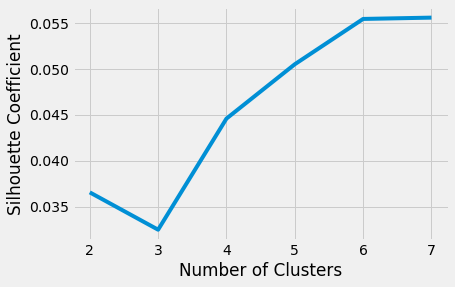

In [20]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice we start at 2 clusters for silhouette coefficient
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k) # **kmeans_kwargs
    kmeans.fit(tf_idf_dataframe_smooth)
    score = silhouette_score(tf_idf_dataframe_smooth, kmeans.labels_)
    silhouette_coefficients.append(score)
    
# Visualisation
plt.style.use("fivethirtyeight")
plt.plot(range(2, 8), silhouette_coefficients)
plt.xticks(range(2, 8))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [21]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice we start at 2 clusters for silhouette coefficient
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k) # **kmeans_kwargs
    kmeans.fit(tf_idf_vec)
    score = silhouette_score(tf_idf_vec, kmeans.labels_)
    silhouette_coefficients.append(score)
    
# Visualisation
plt.style.use("fivethirtyeight")
plt.plot(range(2, 8), silhouette_coefficients)
plt.xticks(range(2, 8))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

TypeError: float() argument must be a string or a number, not 'TfidfVectorizer'